In [8]:
dir = 'D:/projects/datascience/bfu-ml-labs/lab_1.1'

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [9]:
df = pd.read_csv(f'{dir}/student_scores.csv')
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [10]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [11]:
X_name = 'Hours'
y_name = 'Scores'

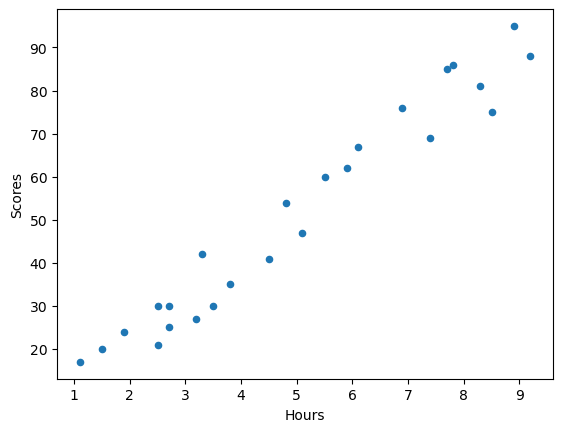

In [12]:
df.plot(kind='scatter', x=X_name, y=y_name)
plt.show()

In [13]:
X = df[X_name]
y = df[y_name]

In [14]:
X_mean = X.mean()
y_mean = y.mean()
X_dev = X - X_mean
y_dev = y - y_mean

In [15]:
slope = np.sum(X_dev * y_dev) / np.sum(X_dev ** 2)

In [16]:
y_intercept = y_mean - slope * X_mean

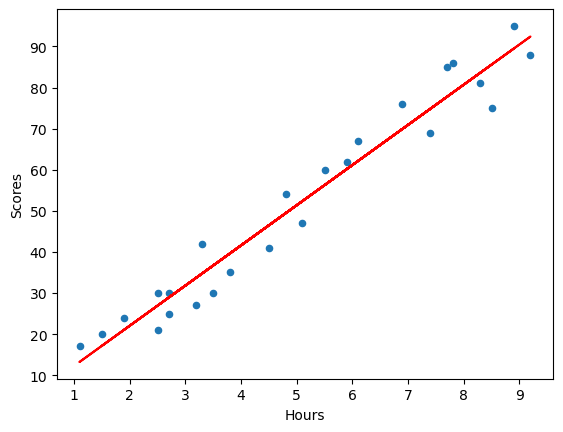

In [17]:
df.plot(kind='scatter', x=X_name, y=y_name)
y_predicted = slope * X + y_intercept
plt.plot(X, y_predicted, color='red')

In [18]:
err_sqr = (y - y_predicted) ** 2
err_sqr

0      35.084084
1      28.518491
2      45.782061
3     111.894131
4      44.876404
5       8.137449
6      19.545812
7      14.058060
8       6.879298
9      15.041541
10     52.455841
11      3.382239
12     29.973311
13     52.652082
14     14.159739
15     30.378577
16      9.466810
17      8.657130
18     23.852732
19     33.926181
20      1.258115
21     21.090784
22     21.452888
23     36.763403
24     52.781099
dtype: float64

In [19]:
sum(err_sqr)

722.0682627311364

In [20]:
from matplotlib.patches import Rectangle

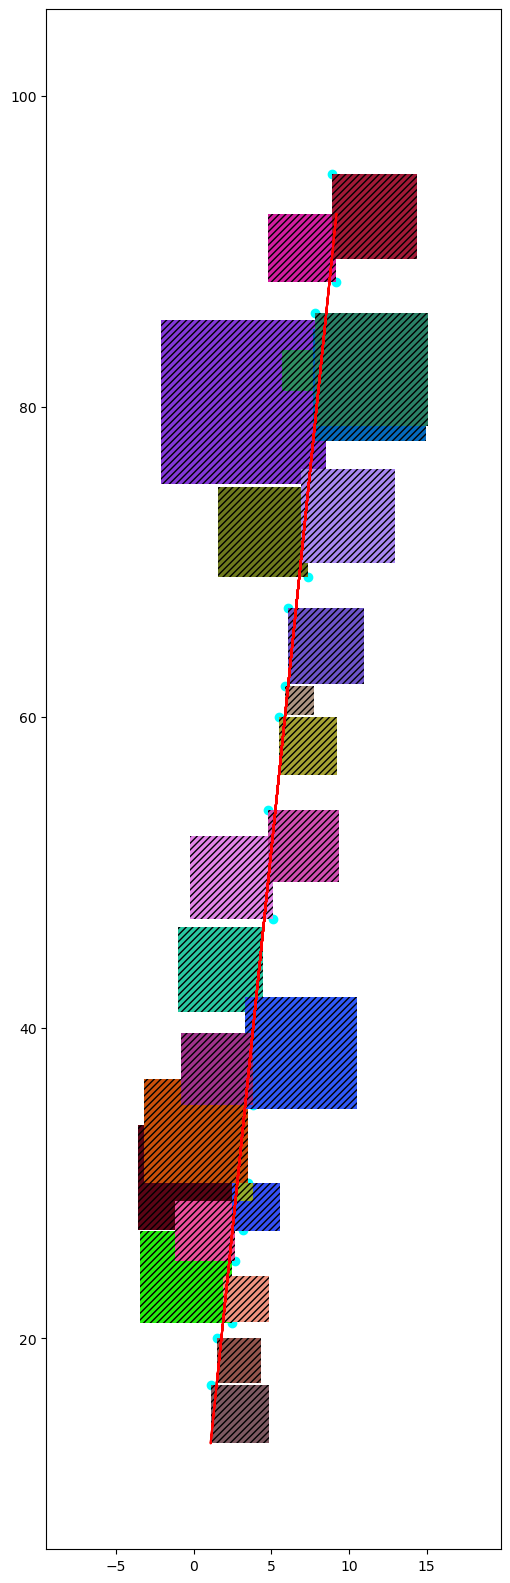

In [21]:
fig, ax = plt.subplots(figsize=(20, 20))
ax.scatter(X, y, color='cyan')
ax.plot(X, y_predicted, color='red')

for i in range(len(X)):
    square_size = np.sqrt(err_sqr[i])
    square_x = X[i]
    square_y = y[i]
    if y[i] > y_predicted[i]:
        square_y -= square_size
    else:
        square_x -= square_size
    color = np.random.randint(0, 255, size=3) / 255
    ax.add_patch(Rectangle(
        xy=(square_x, square_y),
        width=square_size,
        height=square_size,
        hatch='/////',
        facecolor=color
    ))

largest_square_size = np.sqrt(err_sqr.max())
ax.set_xlim(X.min() - largest_square_size, X.max() + largest_square_size)
ax.set_ylim(y.min() - largest_square_size, y.max() + largest_square_size)
ax.set_aspect('equal')


plt.show()